In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataTest.csv')
df

,Calendar Week,Expert Partner,Expert Location,OIT Node 1 (Contact Drivers),OIT Node 2 (Contact Drivers),OIT Node 3 (Contact Drivers),Handled Contacts,AHT,Transfers (%),tNPS,Survey Resp. Rate (tNPS),TNPS Survey Resp. Count,Issue Resolution (tNPS),New MCR 7-Day (Look-forward),Cases,Cases (excl. Internal),# of Experts
0,7/28/2024,CONCENTRIX,Mexico City,Account management,Access and permissions,Login and password,85.,28.1,18.8%,71.4,14.9%,7.,85.7%,21.2%,75.,60.,51.0
1,7/28/2024,CONCENTRIX,Mexico City,Account management,Access and permissions,Manage users,13.,23.9,23.1%,.0,25.0%,2.,50.0%,30.0%,13.,11.,12.0
2,7/28/2024,CONCENTRIX,Mexico City,Account management,Access and permissions,Multi-user mode,20.,41.0,15.0%,25.0,36.4%,4.,75.0%,23.5%,23.,15.,21.0
3,7/28/2024,CONCENTRIX,Mexico City,Account management,Access and permissions,Primary administrator,49.,27.9,8.2%,-25.0,13.8%,4.,66.7%,18.4%,47.,37.,29.0
4,7/28/2024,CONCENTRIX,Mexico City,Account management,Access and permissions,-,149.,29.4,15.4%,29.4,19.1%,17.,75.0%,20.3%,142.,113.,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,11/24/2024,CONCENTRIX,Mexico City,Uncategorized - Inbound Short calls,Uncategorized - Inbound Short calls,Uncategorized - Inbound Short calls,29.,1.3,.0%,-,.0%,.,-,-,17.,11.,16.0
3142,11/24/2024,CONCENTRIX,Mexico City,Uncategorized - Not Handled,Uncategorized - Not Handled,Uncategorized - Not Handled,.,-,-,-,.0%,.,-,-,33.,11.,29.0
3143,11/24/2024,CONCENTRIX,Mexico City,Uncategorized - Others,Uncategorized - Others,Uncategorized - Others,15.,23.0,13.3%,100.0,50.0%,1.,100.0%,-,10.,6.,14.0
3144,11/24/2024,CONCENTRIX,Mexico City,Uncategorized - Outbound Short calls,Uncategorized - Outbound Short calls,Uncategorized - Outbound Short calls,.,-,-,-,-,.,-,-,1.,.,30.0


In [4]:
# Hacer una copia para no alterar el original
df_cleaning = df.copy()

In [5]:
df_cleaning.describe()

,# of Experts
count,3146.000000
mean,20.895105
std,22.299090
min,1.000000
25%,3.000000
50%,11.000000
75%,34.000000
max,96.000000


In [6]:
# Columnas que deben convertirse a valores numéricos
numeric_columns = [
    "Handled Contacts", "AHT", "Transfers (%)", "tNPS", "Survey Resp. Rate (tNPS)",
    "TNPS Survey Resp. Count", "Issue Resolution (tNPS)",
    "New MCR 7-Day (Look-forward)", "Cases", "Cases (excl. Internal)"
]

# Función para limpiar strings numéricos con símbolos
def clean_numeric(series):
    return (
        series.astype(str)
        .str.replace('%', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.strip()
        .replace(['', '.', ' '], np.nan)
        .astype(float)
    )

# Aplicar limpieza a cada columna
for col in numeric_columns:
    df_cleaning[col] = clean_numeric(df_cleaning[col])

# Convertir la fecha a datetime
df_cleaning["Calendar Week"] = pd.to_datetime(df_cleaning["Calendar Week"], errors='coerce')

In [7]:
df_cleaning

,Calendar Week,Expert Partner,Expert Location,OIT Node 1 (Contact Drivers),OIT Node 2 (Contact Drivers),OIT Node 3 (Contact Drivers),Handled Contacts,AHT,Transfers (%),tNPS,Survey Resp. Rate (tNPS),TNPS Survey Resp. Count,Issue Resolution (tNPS),New MCR 7-Day (Look-forward),Cases,Cases (excl. Internal),# of Experts
0,2024-07-28,CONCENTRIX,Mexico City,Account management,Access and permissions,Login and password,85.0,28.1,18.8,71.4,14.9,7.0,85.7,21.2,75.0,60.0,51.0
1,2024-07-28,CONCENTRIX,Mexico City,Account management,Access and permissions,Manage users,13.0,23.9,23.1,0.0,25.0,2.0,50.0,30.0,13.0,11.0,12.0
2,2024-07-28,CONCENTRIX,Mexico City,Account management,Access and permissions,Multi-user mode,20.0,41.0,15.0,25.0,36.4,4.0,75.0,23.5,23.0,15.0,21.0
3,2024-07-28,CONCENTRIX,Mexico City,Account management,Access and permissions,Primary administrator,49.0,27.9,8.2,25.0,13.8,4.0,66.7,18.4,47.0,37.0,29.0
4,2024-07-28,CONCENTRIX,Mexico City,Account management,Access and permissions,-,149.0,29.4,15.4,29.4,19.1,17.0,75.0,20.3,142.0,113.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,2024-11-24,CONCENTRIX,Mexico City,Uncategorized - Inbound Short calls,Uncategorized - Inbound Short calls,Uncategorized - Inbound Short calls,29.0,1.3,0.0,NaN,0.0,NaN,NaN,NaN,17.0,11.0,16.0
3142,2024-11-24,CONCENTRIX,Mexico City,Uncategorized - Not Handled,Uncategorized - Not Handled,Uncategorized - Not Handled,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,33.0,11.0,29.0
3143,2024-11-24,CONCENTRIX,Mexico City,Uncategorized - Others,Uncategorized - Others,Uncategorized - Others,15.0,23.0,13.3,100.0,50.0,1.0,100.0,NaN,10.0,6.0,14.0
3144,2024-11-24,CONCENTRIX,Mexico City,Uncategorized - Outbound Short calls,Uncategorized - Outbound Short calls,Uncategorized - Outbound Short calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0


In [8]:
# Verificamos las columnas categóricas (tipo object)
categorical_cols = df_cleaning.select_dtypes(include='object').columns.tolist()

# Mostramos valores únicos para evaluar limpieza
categorical_summary = {col: df_cleaning[col].unique()[:10] for col in categorical_cols}

categorical_summary

{'Expert Partner': array(['CONCENTRIX'], dtype=object),
 'Expert Location': array(['Mexico City'], dtype=object),
 'OIT Node 1 (Contact Drivers)': array(['Account management', 'Accounting and bookkeeping', 'Banking',
        'Business management', 'Data and systems', 'Employee management',
        'Finance', 'Marketing', 'Payroll', 'Product setup'], dtype=object),
 'OIT Node 2 (Contact Drivers)': array(['Access and permissions', 'Business profile', 'Customer profile',
        'Intuit account billing', 'Intuit account settings',
        'Intuit product orders', 'Intuit subscriptions',
        'Taxpayer Identification numbers', '-', 'Bookkeeping processes'],
       dtype=object),
 'OIT Node 3 (Contact Drivers)': array(['Login and password', 'Manage users', 'Multi-user mode',
        'Primary administrator', '-', 'Business name',
        'Business phone number', 'Manage customers',
        'Intuit account payment method', 'Intuit billing issues'],
       dtype=object)}

In [9]:
# Eliminemos columnas constantes como Expert Partner y Expert Location
columns_to_drop = ["Expert Partner", "Expert Location"]
df_cleaned = df_cleaning.drop(columns=columns_to_drop)

# Reemplazar '-' por NaN en OIT Node 2 y OIT Node 3
df_cleaned[["OIT Node 2 (Contact Drivers)", "OIT Node 3 (Contact Drivers)"]] = (
    df_cleaned[["OIT Node 2 (Contact Drivers)", "OIT Node 3 (Contact Drivers)"]]
    .replace('-', np.nan)
)


In [10]:
df_cleaned

,Calendar Week,OIT Node 1 (Contact Drivers),OIT Node 2 (Contact Drivers),OIT Node 3 (Contact Drivers),Handled Contacts,AHT,Transfers (%),tNPS,Survey Resp. Rate (tNPS),TNPS Survey Resp. Count,Issue Resolution (tNPS),New MCR 7-Day (Look-forward),Cases,Cases (excl. Internal),# of Experts
0,2024-07-28,Account management,Access and permissions,Login and password,85.0,28.1,18.8,71.4,14.9,7.0,85.7,21.2,75.0,60.0,51.0
1,2024-07-28,Account management,Access and permissions,Manage users,13.0,23.9,23.1,0.0,25.0,2.0,50.0,30.0,13.0,11.0,12.0
2,2024-07-28,Account management,Access and permissions,Multi-user mode,20.0,41.0,15.0,25.0,36.4,4.0,75.0,23.5,23.0,15.0,21.0
3,2024-07-28,Account management,Access and permissions,Primary administrator,49.0,27.9,8.2,25.0,13.8,4.0,66.7,18.4,47.0,37.0,29.0
4,2024-07-28,Account management,Access and permissions,-,149.0,29.4,15.4,29.4,19.1,17.0,75.0,20.3,142.0,113.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,2024-11-24,Uncategorized - Inbound Short calls,Uncategorized - Inbound Short calls,Uncategorized - Inbound Short calls,29.0,1.3,0.0,NaN,0.0,NaN,NaN,NaN,17.0,11.0,16.0
3142,2024-11-24,Uncategorized - Not Handled,Uncategorized - Not Handled,Uncategorized - Not Handled,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,33.0,11.0,29.0
3143,2024-11-24,Uncategorized - Others,Uncategorized - Others,Uncategorized - Others,15.0,23.0,13.3,100.0,50.0,1.0,100.0,NaN,10.0,6.0,14.0
3144,2024-11-24,Uncategorized - Outbound Short calls,Uncategorized - Outbound Short calls,Uncategorized - Outbound Short calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0


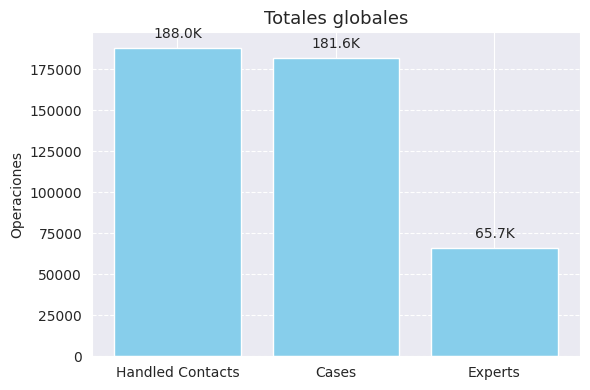

In [17]:
# Datos
totales = {
    "Handled Contacts": df_cleaned["Handled Contacts"].sum(),
    "Cases": df_cleaned["Cases"].sum(),
    "Experts": df_cleaned["# of Experts"].sum()
}

# Gráfico
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(totales.keys(), totales.values(), color='skyblue')

# Mostrar valores abreviados en "K"
for bar in bars:
    height = bar.get_height()
    label = f'{height/1000:.1f}K'  # formato con una decimal y K
    ax.annotate(label,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Estética
ax.set_title("Totales globales", fontsize=13)
ax.set_ylabel("Operaciones")
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('contactVScases.png')
plt.show()


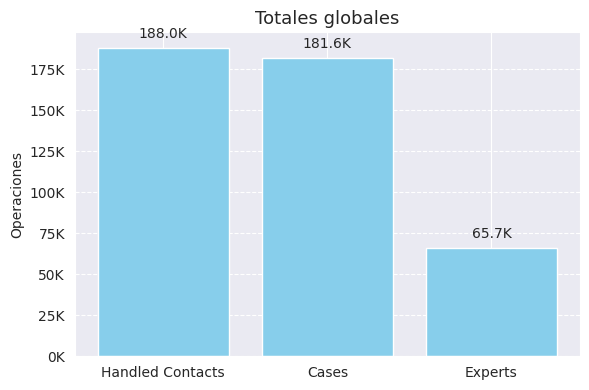

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Datos
totales = {
    "Handled Contacts": df_cleaned["Handled Contacts"].sum(),
    "Cases": df_cleaned["Cases"].sum(),
    "Experts": df_cleaned["# of Experts"].sum()
}

# Función para formatear en "K"
def format_k(x, pos):
    return f'{x*1.0/1000:.0f}K'

formatter = FuncFormatter(format_k)

# Gráfico
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(totales.keys(), totales.values(), color='skyblue')

# Agregar etiquetas abreviadas encima de cada barra
for bar in bars:
    height = bar.get_height()
    label = f'{height/1000:.1f}K'
    ax.annotate(label,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Formato de eje Y
ax.yaxis.set_major_formatter(formatter)

# Estética
ax.set_title("Totales globales", fontsize=13)
ax.set_ylabel("Operaciones")
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('contactVScases_Kaxis.png')
plt.show()


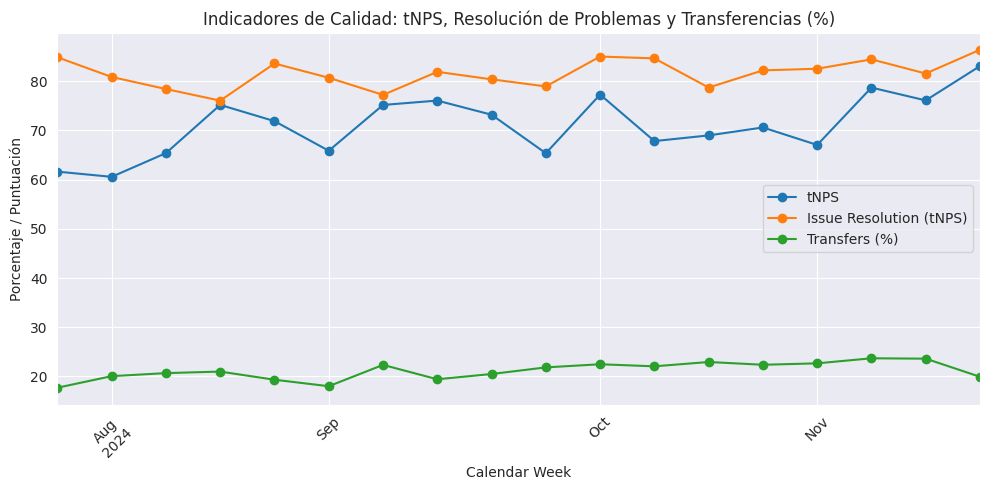

In [20]:
import matplotlib.pyplot as plt

# Filtrar datos válidos
df_calidad = df_cleaned.copy()
df_calidad = df_calidad[
    (df_calidad["tNPS"].notna()) &
    (df_calidad["Issue Resolution (tNPS)"].notna()) &
    (df_calidad["Transfers (%)"].notna()) &
    (df_calidad["Calendar Week"].notna())
]

# Agrupación semanal
df_calidad_grouped = df_calidad.groupby("Calendar Week")[
    ["tNPS", "Issue Resolution (tNPS)", "Transfers (%)"]
].mean()

# Gráfico de evolución de calidad
fig, ax = plt.subplots(figsize=(10, 5))
df_calidad_grouped.plot(ax=ax, marker='o')
plt.title("Indicadores de Calidad: tNPS, Resolución de Problemas y Transferencias (%)")
plt.ylabel("Porcentaje / Puntuación")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('indicadores1.png')
plt.show()


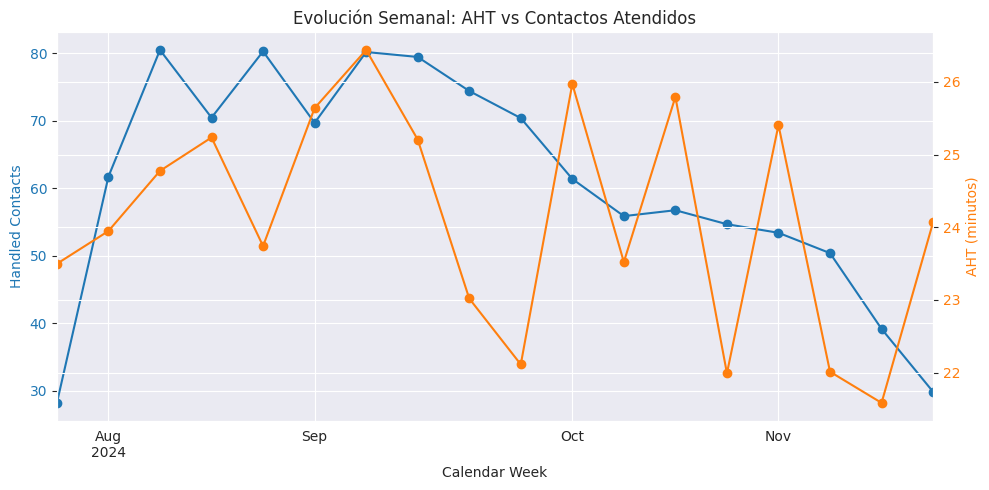

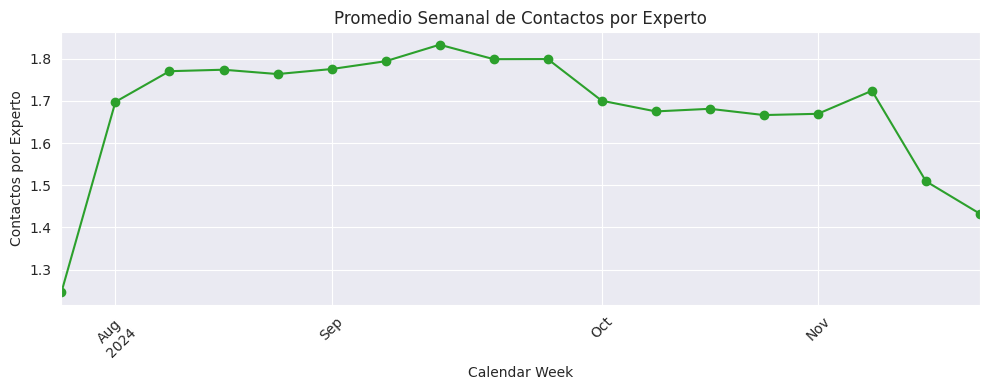

In [21]:
# Asegurarnos de que no haya NaNs en los indicadores clave
df_op = df_cleaned.copy()
df_op = df_op[
    (df_op["Handled Contacts"] > 0) &
    (df_op["# of Experts"] > 0) &
    (df_op["AHT"].notna())
]

# Crear columna de Contactos por Experto
df_op["Contactos por Experto"] = df_op["Handled Contacts"] / df_op["# of Experts"]

# Agrupar por semana para análisis temporal
df_operativos_weekly = df_op.groupby("Calendar Week")[
    ["Handled Contacts", "AHT", "# of Experts", "Contactos por Experto"]
].mean()

# Gráfico 1: AHT vs Contactos
fig, ax1 = plt.subplots(figsize=(10, 5))
df_operativos_weekly["Handled Contacts"].plot(ax=ax1, color="tab:blue", marker='o', label="Handled Contacts")
ax1.set_ylabel("Handled Contacts", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

ax2 = ax1.twinx()
df_operativos_weekly["AHT"].plot(ax=ax2, color="tab:orange", marker='o', label="AHT")
ax2.set_ylabel("AHT (minutos)", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")
plt.title("Evolución Semanal: AHT vs Contactos Atendidos")
fig.tight_layout()
plt.savefig("evolucionsem1.png")
plt.show()

# Gráfico 2: Contactos por Experto
plt.figure(figsize=(10, 4))
df_operativos_weekly["Contactos por Experto"].plot(marker='o', color='tab:green')
plt.title("Promedio Semanal de Contactos por Experto")
plt.ylabel("Contactos por Experto")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("promediosem1.png")
plt.show()


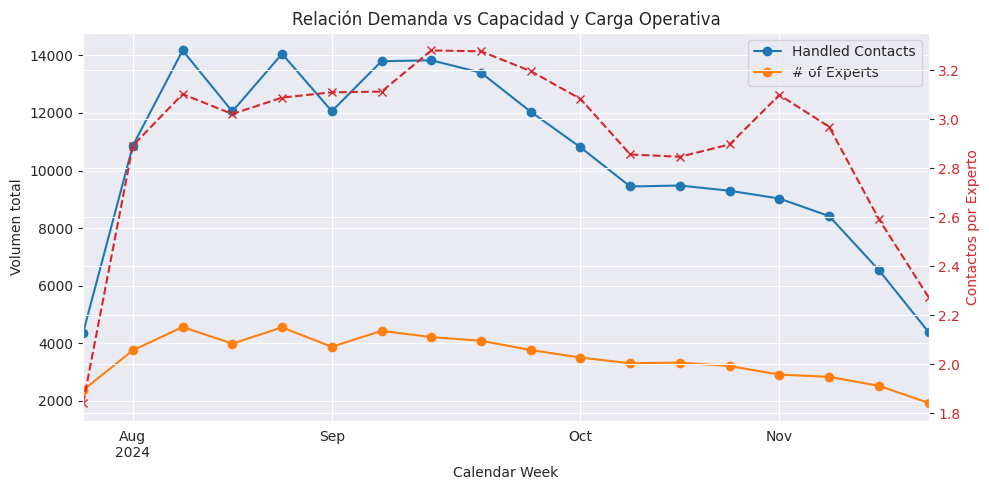

In [22]:
# Agrupar por semana: sumar contactos y expertos
df_balance = df_cleaned.copy()
df_balance = df_balance[
    (df_balance["Handled Contacts"] > 0) &
    (df_balance["# of Experts"] > 0)
]

df_weekly = df_balance.groupby("Calendar Week")[
    ["Handled Contacts", "# of Experts"]
].sum()

# Añadir columna de carga relativa (contactos por experto)
df_weekly["Contactos por Experto"] = df_weekly["Handled Contacts"] / df_weekly["# of Experts"]

# Gráfico: Comparación demanda vs capacidad y carga relativa
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje primario: contactos y expertos
df_weekly[["Handled Contacts", "# of Experts"]].plot(ax=ax1, marker='o')
ax1.set_ylabel("Volumen total")
ax1.set_title("Relación Demanda vs Capacidad y Carga Operativa")
ax1.grid(True)

# Eje secundario: carga relativa
ax2 = ax1.twinx()
df_weekly["Contactos por Experto"].plot(ax=ax2, color='tab:red', marker='x', linestyle='--', label="Carga por Experto")
ax2.set_ylabel("Contactos por Experto", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.savefig("equivCarga.png")
plt.show()


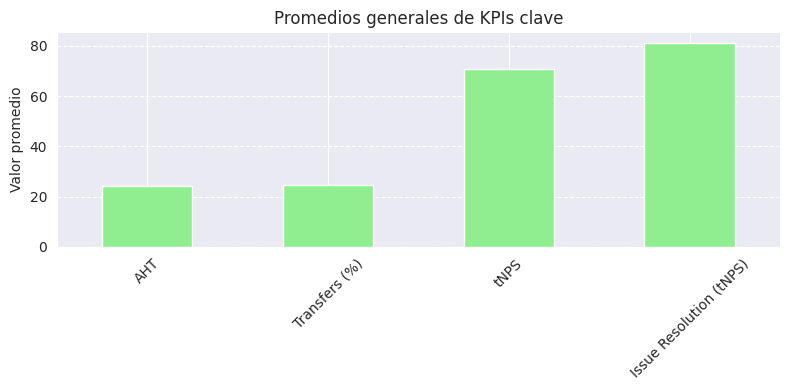

In [12]:
# KPIs claves: eficiencia y calidad
kpi_medias = df_cleaned[["AHT", "Transfers (%)", "tNPS", "Issue Resolution (tNPS)"]].mean()

plt.figure(figsize=(8, 4))
kpi_medias.plot(kind='bar', color='lightgreen')
plt.title("Promedios generales de KPIs clave")
plt.ylabel("Valor promedio")
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


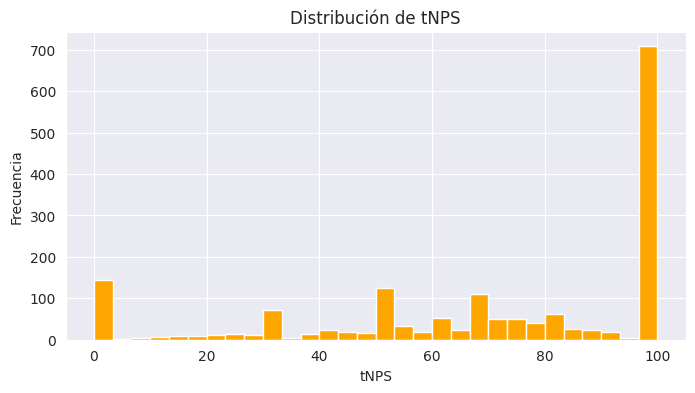

In [13]:
plt.figure(figsize=(8, 4))
df_cleaned["tNPS"].hist(bins=30, color='orange')
plt.title("Distribución de tNPS")
plt.xlabel("tNPS")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


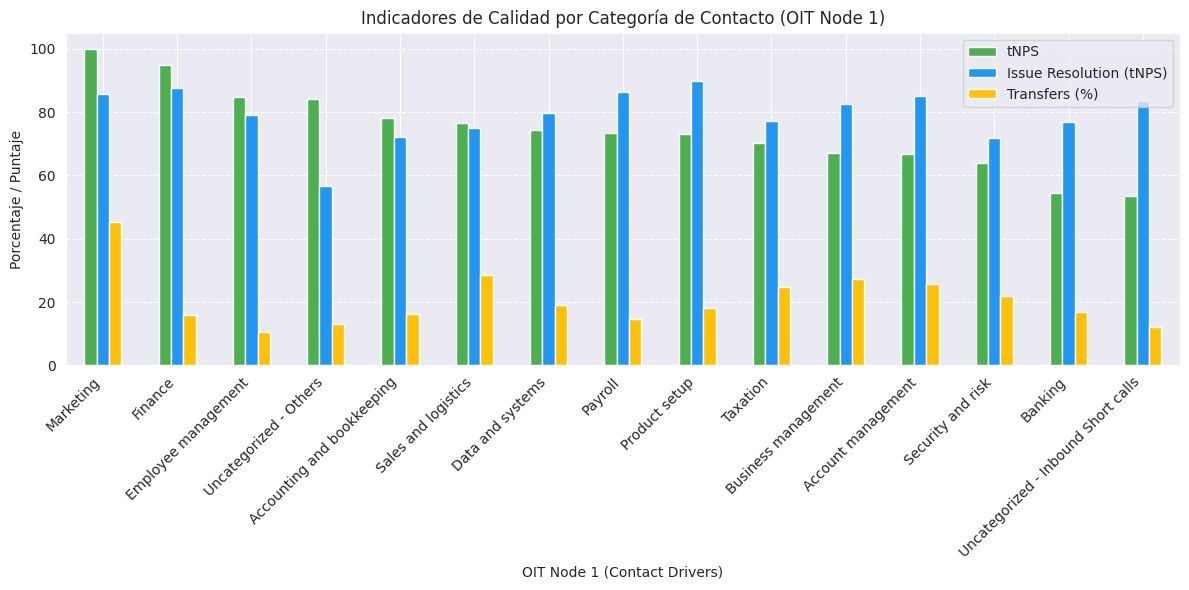

In [25]:
# Filtrar registros válidos con tNPS y categoría
df_calidad_nodo = df_cleaned.copy()
df_calidad_nodo = df_calidad_nodo[
    (df_calidad_nodo["tNPS"].notna()) &
    (df_calidad_nodo["Issue Resolution (tNPS)"].notna()) &
    (df_calidad_nodo["Transfers (%)"].notna()) &
    (df_calidad_nodo["OIT Node 1 (Contact Drivers)"].notna())
]

# Agrupar por categoría (OIT Node 1)
calidad_por_nodo = df_calidad_nodo.groupby("OIT Node 1 (Contact Drivers)")[
    ["tNPS", "Issue Resolution (tNPS)", "Transfers (%)"]
].mean().sort_values("tNPS", ascending=False)

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))
calidad_por_nodo.plot(kind='bar', ax=ax, color=["#4CAF50", "#2196F3", "#FFC107"])
plt.title("Indicadores de Calidad por Categoría de Contacto (OIT Node 1)")
plt.ylabel("Porcentaje / Puntaje")
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("calidadOITNode1.png")
plt.show()


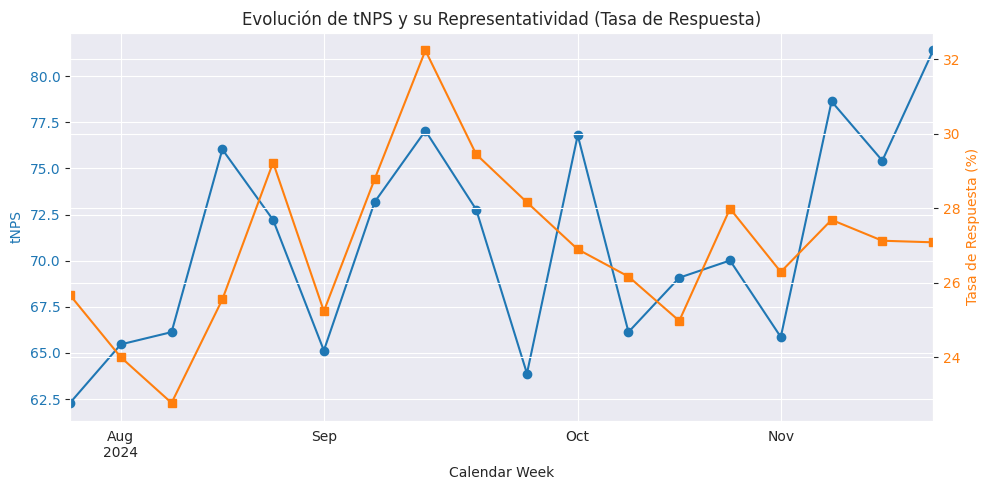

In [27]:
# Filtrar registros con datos necesarios para el análisis de representatividad
df_rep = df_cleaned.copy()
df_rep = df_rep[
    (df_rep["tNPS"].notna()) &
    (df_rep["Survey Resp. Rate (tNPS)"].notna()) &
    (df_rep["Calendar Week"].notna())
]

# Agrupar por semana para ver evolución
df_rep_grouped = df_rep.groupby("Calendar Week")[
    ["tNPS", "Survey Resp. Rate (tNPS)"]
].mean()

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(10, 5))

df_rep_grouped["tNPS"].plot(ax=ax1, color="tab:blue", marker='o', label="tNPS")
ax1.set_ylabel("tNPS", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.set_title("Evolución de tNPS y su Representatividad (Tasa de Respuesta)")
ax1.grid(True)

# Eje secundario para tasa de respuesta
ax2 = ax1.twinx()
df_rep_grouped["Survey Resp. Rate (tNPS)"].plot(ax=ax2, color="tab:orange", marker='s', label="Tasa de Respuesta")
ax2.set_ylabel("Tasa de Respuesta (%)", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

plt.xticks(rotation=45)
fig.tight_layout()
plt.savefig("evolucionOP.png")
plt.show()


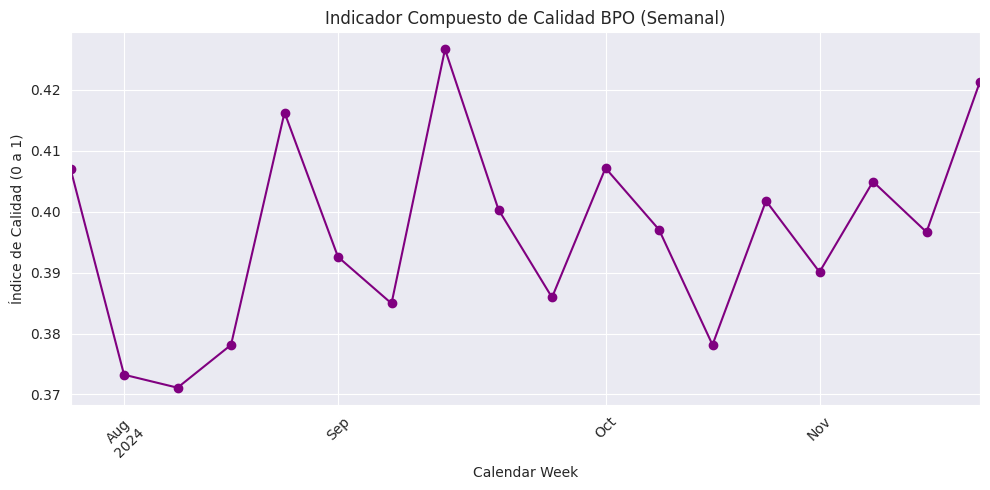

In [28]:
# Copiar y preparar el dataframe
df_compuesto = df_cleaned.copy()

# Filtrar registros válidos para los cuatro indicadores
df_compuesto = df_compuesto[
    (df_compuesto["tNPS"].notna()) &
    (df_compuesto["Issue Resolution (tNPS)"].notna()) &
    (df_compuesto["Transfers (%)"].notna()) &
    (df_compuesto["Survey Resp. Rate (tNPS)"].notna()) &
    (df_compuesto["AHT"].notna())
]

# Normalización de tNPS de [-100, 100] a [0, 1]
df_compuesto["tNPS_norm"] = (df_compuesto["tNPS"] + 100) / 200

# Penalización por baja tasa de respuesta
df_compuesto["tNPS_ajustado"] = df_compuesto["tNPS_norm"] * (df_compuesto["Survey Resp. Rate (tNPS)"] / 100)

# Penalización por transferencias elevadas (valor será restado)
df_compuesto["Penalización_Transfer"] = df_compuesto["Transfers (%)"] / 100

# Factor eficiencia contextualizado: penaliza si AHT es muy bajo y tNPS también
df_compuesto["Eficiencia"] = df_compuesto.apply(
    lambda row: 0.0 if (row["AHT"] < 10 and row["tNPS"] < 20) else 1.0, axis=1
)

# Ponderación
w1, w2, w3, w4 = 0.4, 0.3, 0.2, 0.1

# Cálculo del indicador compuesto
df_compuesto["Calidad_BPO"] = (
    w1 * df_compuesto["tNPS_ajustado"] +
    w2 * (df_compuesto["Issue Resolution (tNPS)"] / 100) -
    w3 * df_compuesto["Penalización_Transfer"] +
    w4 * df_compuesto["Eficiencia"]
)

# Agrupar por semana para visualización
df_calidad_semana = df_compuesto.groupby("Calendar Week")["Calidad_BPO"].mean()

# Graficar evolución del indicador compuesto
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_calidad_semana.plot(marker='o', color='purple')
plt.title("Indicador Compuesto de Calidad BPO (Semanal)")
plt.ylabel("Índice de Calidad (0 a 1)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("indicadorCalidad.png")
plt.show()


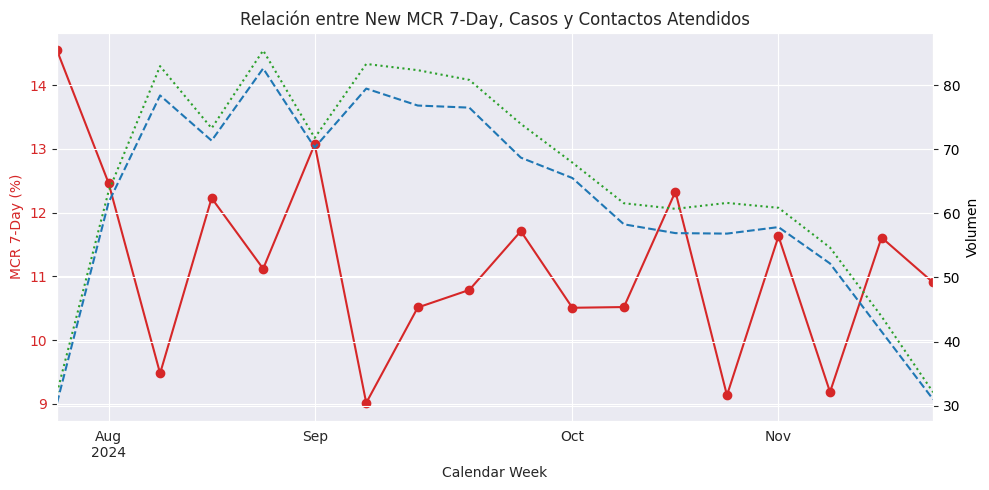

[]

In [29]:
# Filtrar datos necesarios para la relación
df_mcr_combo = df_cleaned.copy()
df_mcr_combo = df_mcr_combo[
    (df_mcr_combo["New MCR 7-Day (Look-forward)"].notna()) &
    (df_mcr_combo["Cases"].notna()) &
    (df_mcr_combo["Handled Contacts"].notna()) &
    (df_mcr_combo["Calendar Week"].notna())
]

# Agrupación semanal
df_mcr_semana = df_mcr_combo.groupby("Calendar Week")[
    ["New MCR 7-Day (Look-forward)", "Cases", "Handled Contacts"]
].mean()

# Graficar evolución combinada
fig, ax1 = plt.subplots(figsize=(10, 5))

df_mcr_semana["New MCR 7-Day (Look-forward)"].plot(ax=ax1, color="tab:red", marker='o', label="New MCR 7-Day")
ax1.set_ylabel("MCR 7-Day (%)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")
ax1.set_title("Relación entre New MCR 7-Day, Casos y Contactos Atendidos")
ax1.grid(True)

# Eje secundario: volumen de casos y contactos
ax2 = ax1.twinx()
df_mcr_semana["Cases"].plot(ax=ax2, color="tab:blue", linestyle='--', label="Cases")
df_mcr_semana["Handled Contacts"].plot(ax=ax2, color="tab:green", linestyle=':', label="Handled Contacts")
ax2.set_ylabel("Volumen", color="black")
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()
plt.xticks(rotation=45)
plt.savefig("mcr_7.png")
plt.show()

# Detección automática de semanas de alto riesgo (umbral de MCR > 25%)
high_risk_weeks = df_mcr_semana[df_mcr_semana["New MCR 7-Day (Look-forward)"] > 25]
high_risk_weeks.index.strftime("%Y-%m-%d").tolist()


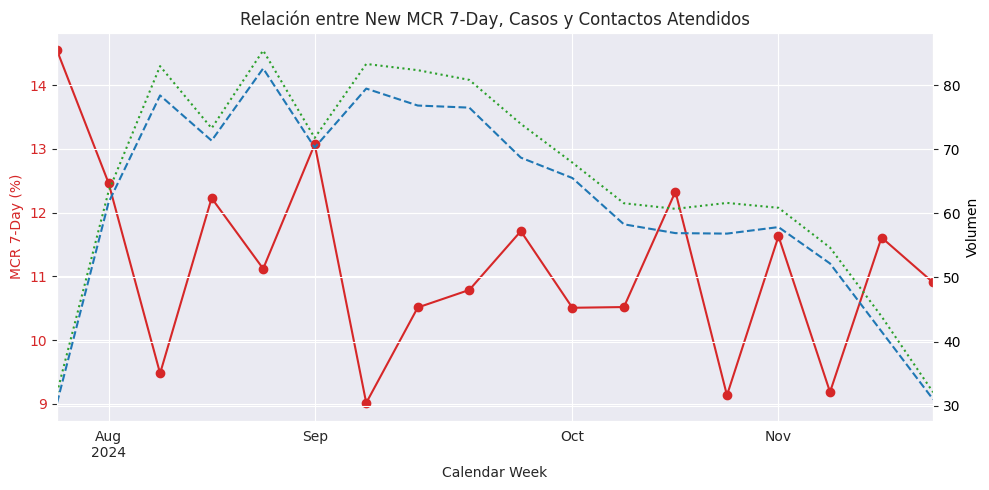

[]

In [30]:
# Filtrar datos necesarios para la relación
df_mcr_combo = df_cleaned.copy()
df_mcr_combo = df_mcr_combo[
    (df_mcr_combo["New MCR 7-Day (Look-forward)"].notna()) &
    (df_mcr_combo["Cases"].notna()) &
    (df_mcr_combo["Handled Contacts"].notna()) &
    (df_mcr_combo["Calendar Week"].notna())
]

# Agrupación semanal
df_mcr_semana = df_mcr_combo.groupby("Calendar Week")[
    ["New MCR 7-Day (Look-forward)", "Cases", "Handled Contacts"]
].mean()

# Graficar evolución combinada
fig, ax1 = plt.subplots(figsize=(10, 5))

df_mcr_semana["New MCR 7-Day (Look-forward)"].plot(ax=ax1, color="tab:red", marker='o', label="New MCR 7-Day")
ax1.set_ylabel("MCR 7-Day (%)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")
ax1.set_title("Relación entre New MCR 7-Day, Casos y Contactos Atendidos")
ax1.grid(True)

# Eje secundario: volumen de casos y contactos
ax2 = ax1.twinx()
df_mcr_semana["Cases"].plot(ax=ax2, color="tab:blue", linestyle='--', label="Cases")
df_mcr_semana["Handled Contacts"].plot(ax=ax2, color="tab:green", linestyle=':', label="Handled Contacts")
ax2.set_ylabel("Volumen", color="black")
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Detección automática de semanas de alto riesgo (umbral de MCR > 25%)
high_risk_weeks = df_mcr_semana[df_mcr_semana["New MCR 7-Day (Look-forward)"] > 25]
high_risk_weeks.index.strftime("%Y-%m-%d").tolist()


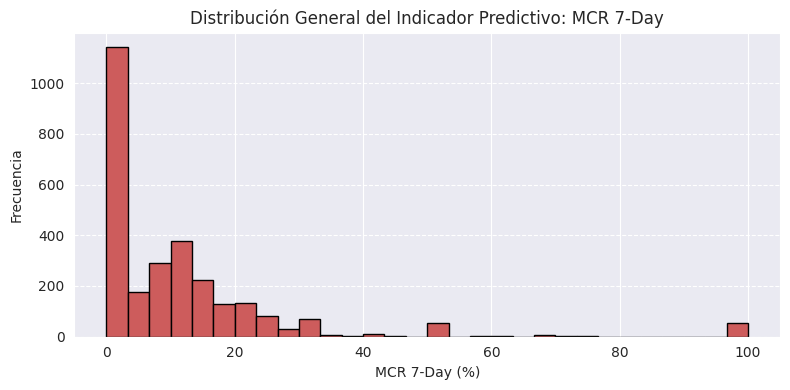

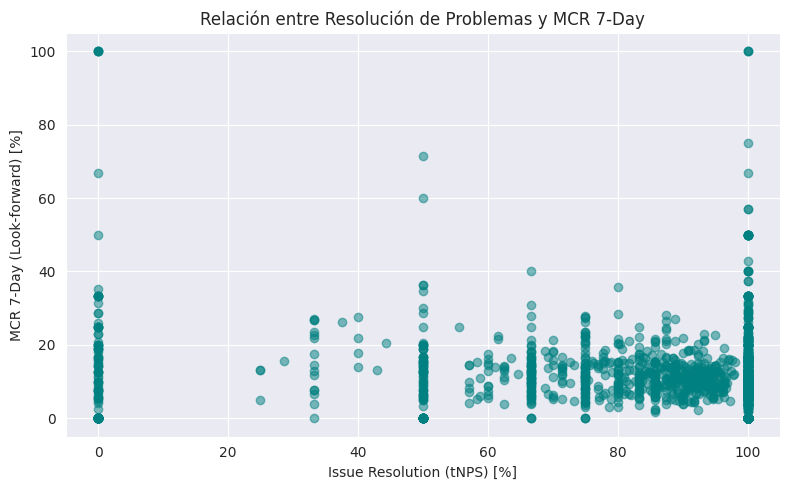

In [32]:
import matplotlib.pyplot as plt

# Histograma del MCR 7-Day
plt.figure(figsize=(8, 4))
df_mcr_combo["New MCR 7-Day (Look-forward)"].hist(bins=30, color='indianred', edgecolor='black')
plt.title("Distribución General del Indicador Predictivo: MCR 7-Day")
plt.xlabel("MCR 7-Day (%)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Relación con Issue Resolution
plt.figure(figsize=(8, 5))
plt.scatter(
    df_mcr_combo["Issue Resolution (tNPS)"],
    df_mcr_combo["New MCR 7-Day (Look-forward)"],
    alpha=0.5,
    color='teal'
)
plt.title("Relación entre Resolución de Problemas y MCR 7-Day")
plt.xlabel("Issue Resolution (tNPS) [%]")
plt.ylabel("MCR 7-Day (Look-forward) [%]")
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# Evaluar desde 5% hasta 25% en pasos de 1% para encontrar el umbral mínimo donde se detectan semanas
umbral_detectado = None
for threshold in range(5, 26):
    semanas = df_mcr_semana[df_mcr_semana["New MCR 7-Day (Look-forward)"] > threshold]
    if not semanas.empty:
        umbral_detectado = threshold
        break

umbral_detectado


5

In [35]:
# 1. Ver semanas con MCR 7-Day > 5%
semanas_riesgo_5 = df_mcr_semana[df_mcr_semana["New MCR 7-Day (Look-forward)"] > 5]

# 2. Calcular el percentil 90 para definir el umbral de "top 10% de riesgo"
percentil_90 = df_mcr_semana["New MCR 7-Day (Look-forward)"].quantile(0.9)

# 3. Seleccionar semanas en el top 10% de riesgo
semanas_top10 = df_mcr_semana[df_mcr_semana["New MCR 7-Day (Look-forward)"] >= percentil_90]

# Preparar resumen para recomendaciones
{
    "Semanas > 5% de MCR": semanas_riesgo_5.index.strftime("%Y-%m-%d").tolist(),
    "Umbral top 10% (percentil 90)": round(percentil_90, 2),
    "Semanas top 10% de riesgo": semanas_top10.index.strftime("%Y-%m-%d").tolist()
}


{'Semanas > 5% de MCR': ['2024-07-28',
  '2024-08-04',
  '2024-08-11',
  '2024-08-18',
  '2024-08-25',
  '2024-09-01',
  '2024-09-08',
  '2024-09-15',
  '2024-09-22',
  '2024-09-29',
  '2024-10-06',
  '2024-10-13',
  '2024-10-20',
  '2024-10-27',
  '2024-11-03',
  '2024-11-10',
  '2024-11-17',
  '2024-11-24'],
 'Umbral top 10% (percentil 90)': np.float64(12.65),
 'Semanas top 10% de riesgo': ['2024-07-28', '2024-09-01']}

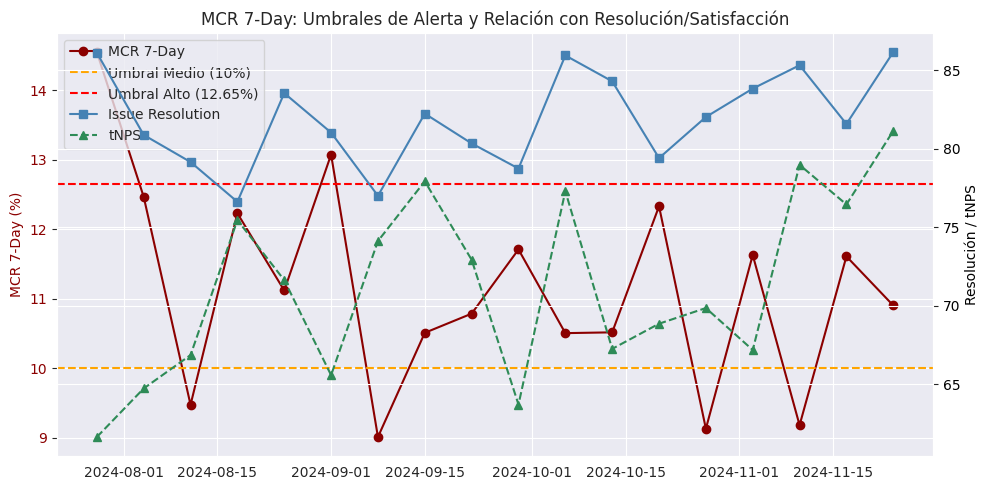

In [36]:
# Definir umbrales de alerta
umbral_medio = 10  # alerta moderada
umbral_alto = 12.65  # percentil 90 - alerta crítica

# Crear gráfico de MCR con umbrales y otras métricas relacionadas
fig, ax1 = plt.subplots(figsize=(10, 5))

# Línea de MCR
ax1.plot(df_mcr_semana.index, df_mcr_semana["New MCR 7-Day (Look-forward)"],
         marker='o', color='darkred', label='MCR 7-Day')
ax1.set_ylabel("MCR 7-Day (%)", color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_title("MCR 7-Day: Umbrales de Alerta y Relación con Resolución/Satisfacción")
ax1.axhline(umbral_medio, color='orange', linestyle='--', linewidth=1.5, label='Umbral Medio (10%)')
ax1.axhline(umbral_alto, color='red', linestyle='--', linewidth=1.5, label='Umbral Alto (12.65%)')
ax1.grid(True)

# Eje secundario: resolución y satisfacción
ax2 = ax1.twinx()
ax2.plot(df_mcr_semana.index, df_mcr_combo.groupby("Calendar Week")["Issue Resolution (tNPS)"].mean(),
         marker='s', color='steelblue', linestyle='-', label='Issue Resolution')
ax2.plot(df_mcr_semana.index, df_mcr_combo.groupby("Calendar Week")["tNPS"].mean(),
         marker='^', color='seagreen', linestyle='--', label='tNPS')
ax2.set_ylabel("Resolución / tNPS", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


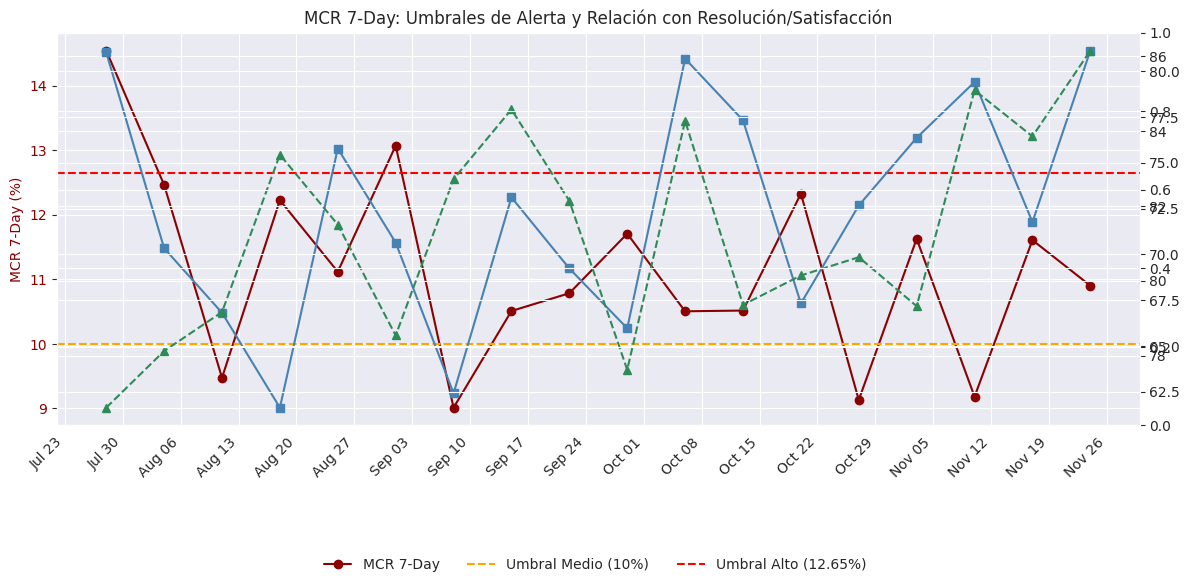

In [38]:
import matplotlib.dates as mdates

# Crear gráfico con mejora en el formato de fechas del eje X
fig, ax1 = plt.subplots(figsize=(12, 5))

# Línea principal: MCR 7-Day
line1, = ax1.plot(df_mcr_semana.index, df_mcr_semana["New MCR 7-Day (Look-forward)"],
                  marker='o', color='darkred', label='MCR 7-Day')
ax1.set_ylabel("MCR 7-Day (%)", color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_title("MCR 7-Day: Umbrales de Alerta y Relación con Resolución/Satisfacción")
ax1.axhline(umbral_medio, color='orange', linestyle='--', linewidth=1.5, label='Umbral Medio (10%)')
ax1.axhline(umbral_alto, color='red', linestyle='--', linewidth=1.5, label='Umbral Alto (12.65%)')
ax1.grid(True)

# Eje secundario: resolución y tNPS
line2, = ax1.twinx().plot(df_mcr_semana.index, df_mcr_combo.groupby("Calendar Week")["Issue Resolution (tNPS)"].mean(),
                          marker='s', color='steelblue', linestyle='-', label='Issue Resolution')
line3, = ax1.twinx().plot(df_mcr_semana.index, df_mcr_combo.groupby("Calendar Week")["tNPS"].mean(),
                          marker='^', color='seagreen', linestyle='--', label='tNPS')

# Mejora del eje X: fechas más espaciadas y formato más claro
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Combinar leyendas y colocarlas debajo
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1.twinx().get_legend_handles_labels()
fig.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1),
           ncol=3, frameon=False)

plt.tight_layout()
plt.savefig("alertas.png")
plt.show()
